# Build a Supervisor Multi-Agent System for Financial Research and Data Analysis with LangGraph

In this project we will be building a Multi-Agent System following the Supervisor Architecture. The Supervisor Agent will supervised two sub-agents, 'Financial Researcher' and 'Coder'to help get useful financial data, analyze and visualize them using graphs.

![](https://i.imgur.com/VnGr1n3.png)


### Supervisor Multi-Agent System for Financial Research and Data Analysis

This project focuses on building a **Supervisor Multi-Agent System for Financial Research and Data Analysis**. The system uses a supervisor agent design, where a **Supervisor Agent** delegates tasks to specialized sub-agents to efficiently handle complex financial queries and data analysis tasks. The workflow is as follows:

1. **Supervisor Agent**:
   - Analyzes the user's query to determine the required actions.
   - Dynamically delegates tasks to one of the following sub-agents:
     - **Financial Researcher Agent**: Responsible for retrieving financial data.
     - **Coder & Visualization Agent**: Responsible for data processing and visualization.
   - Maintains control over the process by monitoring the state and progress of both sub-agents, ensuring the query is fully resolved.

2. **Financial Researcher Agent**:
   - Uses **financial and web search tools** to gather relevant data and insights based on the user query.
   - Returns the collected data to the Supervisor Agent for further processing.
   - Example: Retrieves financial metrics such as ROE (Return on Equity) for companies like NVIDIA, Apple, Intel, Microsoft, and Amazon.

3. **Coder & Visualization Agent**:
   - Takes the data provided by the Financial Researcher Agent or directly delegated by the Supervisor Agent.
   - Uses **programming tools**, in this case Python, to:
     - Process the data.
     - Generate visualizations like bar charts, line graphs, etc., to represent the results.
   - Sends the generated output back to the Supervisor Agent.

4. **Dynamic Task Coordination**:
   - The Supervisor Agent coordinates between the sub-agents iteratively, based on the task's progress and the current state.
   - Continuously evaluates whether additional data collection, computation, or visualization is needed.
   - Ensures seamless integration between data retrieval and analysis tasks.

5. **Final Response**:
   - Once all tasks are completed, the Supervisor Agent compiles the outputs from the sub-agents into a cohesive final response.
   - Example: Produces a bar chart displaying the ROE values for the selected companies, fulfilling the user's query.


## Install OpenAI, LangGraph and LangChain dependencies

In [ ]:
!pip install langchain==0.3.14
!pip install langchain-openai==0.3.0
!pip install langchain-community==0.3.14
!pip install langgraph==0.2.64
!pip install langchain-experimental==0.3.4
!pip install yfinance==0.2.51

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.9/326.9 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.0
    Uninstalling langsmith-0.3.0:
      Successfully uninstalled langsmith-0.3.0
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.15
    Uninstalling langchain-0.3.15:
      Successfully uninstalled langchain-0.3.15
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.6/142.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Install OpenBB

In [ ]:
!pip install openbb[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 5.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of poetry-plugin-export to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.3/276.3 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━

## Enter Open AI API Key

In [ ]:
from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key: ')

Enter Open AI API Key: ··········


## Enter OpenBB Key

Get a free API key from [here](https://my.openbb.co/app/platform/pat)

In [ ]:
from getpass import getpass

OPENBB_PAT = getpass('Enter OpenBB Personal Access Token (PAT): ')

Enter OpenBB Personal Access Token (PAT): ··········


## Enter Tavily Search API Key

Get a free API key from [here](https://tavily.com/#api)

In [ ]:
TAVILY_API_KEY = getpass('Enter Tavily Search API Key: ')

Enter Tavily Search API Key: ··········


## Setup Environment Variables

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY
os.environ['TAVILY_API_KEY'] = TAVILY_API_KEY

In [ ]:
from openbb import obb
# takes 1 min to setup
obb.account.login(pat=OPENBB_PAT)

Extensions to add: alpha_vantage@1.3.5, biztoc@1.3.5, cboe@1.3.5, ecb@1.3.5, econometrics@1.4.5, finra@1.3.5, finviz@1.2.5, government_us@1.3.5, multpl@1.0.5, nasdaq@1.3.5, openbb_charting@2.2.5, quantitative@1.3.5, seeking_alpha@1.3.5, stockgrid@1.3.5, technical@1.3.5, tmx@1.2.5, tradier@1.2.5, wsj@1.3.5

Building...


## Create Financial Tools

**Financial Analysis Tools**:
   The system integrates multiple tools to get useful financial data and metrics:
   - **SEARCH_WEB**: Fetches general stock market information from the web.
   - **GET_STOCK_FUNDAMENTAL_INDICATOR_METRICS**: Provides insights into key financial metrics such as P/E ratio, ROE, etc.
   - **GET_STOCK_NEWS**: Extracts the latest news and updates related to stocks or markets.
   - **GET_GENERAL_MARKET_DATA**: Fetches data on overall market trends and performance.
   - **GET_STOCK_TICKER**: Validates and fetches stock ticker symbols based on user queries.
   - **GET_STOCK_PRICE_METRICS**: Retrieves price trends, performance, and metrics for specific stocks.

In [ ]:
from langchain_community.utilities.tavily_search import TavilySearchAPIWrapper
from langchain_core.tools import tool
import json
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

tavily_search = TavilySearchAPIWrapper()

@tool
def search_web(query: str, num_results=10) -> list:
    """Search the web for a query. Userful for general information or general news"""
    results = tavily_search.raw_results(query=query,
                                        max_results=num_results,
                                        search_depth='advanced',
                                        include_answer=False,
                                        include_raw_content=True)
    return results

@tool
def get_stock_ticker_symbol(stock_name: str) -> str:
    """Get the symbol, name and CIK for any publicly traded company"""
    # Use OpenBB to search for stock ticker symbol and company details by name.
    # The provider "sec" fetches data from the U.S. Securities and Exchange Commission (SEC).
    res = obb.equity.search(stock_name, provider="sec")

    # Convert the result to a DataFrame and format it as markdown for readability.
    stock_ticker_details = res.to_df().to_markdown()

    # Prepare the output with the stock details.
    output = """Here are the details of the company and its stock ticker symbol:\n\n""" + stock_ticker_details
    return output

@tool
def get_stock_price_metrics(stock_ticker: str) -> str:
    """Get historical stock price data, stock price quote and price performance data
       like price changes for a specific stock ticker"""

    # Fetch the latest stock price quote using "cboe" provider.
    res = obb.equity.price.quote(stock_ticker, provider='cboe')
    price_quote = res.to_df().to_markdown()

    # Retrieve stock price performance metrics (e.g., percentage change) using "finviz" provider.
    res = obb.equity.price.performance(symbol=stock_ticker, provider='finviz')
    price_performance = res.to_df().to_markdown()

    # Fetch historical price data for the past year using "yfinance" provider.
    end_date = datetime.now()
    start_date = (end_date - timedelta(days=365)).strftime("%Y-%m-%d")
    res = obb.equity.price.historical(symbol=stock_ticker, start_date=start_date,
                                      interval='1d', provider='yfinance')
    price_historical = res.to_df().to_markdown()

    # Combine the results into a formatted output.
    output = ("""Here are the stock price metrics and data for the stock ticker symbol """ + stock_ticker + """: \n\n""" +
              "Price Quote Metrics:\n\n" + price_quote +
              "\n\nPrice Performance Metrics:\n\n" + price_performance +
              "\n\nPrice Historical Data:\n\n" + price_historical)
    return output

@tool
def get_stock_fundamental_indicator_metrics(stock_ticker: str) -> str:
    """Get fundamental indicator metrics for a specific stock ticker"""

    # Retrieve fundamental financial ratios (e.g., P/E ratio, ROE) using "fmp" provider.
    res = obb.equity.fundamental.ratios(symbol=stock_ticker, period='annual',
                                        limit=10, provider='fmp')
    fundamental_ratios = res.to_df().to_markdown()

    # Fetch additional fundamental metrics (e.g., EBITDA, revenue growth) using "yfinance" provider.
    res = obb.equity.fundamental.metrics(symbol=stock_ticker, period='annual',
                                        limit=10, provider='yfinance')
    fundamental_metrics = res.to_df().to_markdown()

    # Combine fundamental ratios and metrics into a single output.
    output = ("""Here are the fundamental indicator metrics and data for the stock ticker symbol """ + stock_ticker + """: \n\n""" +
              "Fundamental Ratios:\n\n" + fundamental_ratios +
              "\n\nFundamental Metrics:\n\n" + fundamental_metrics)
    return output

@tool
def get_stock_news(stock_ticker: str) -> str:
    """Get news article headlines for a specific stock ticker"""

    # Define the date range to fetch news (last 45 days).
    end_date = datetime.now()
    start_date = (end_date - timedelta(days=45)).strftime("%Y-%m-%d")

    # Retrieve news headlines for the stock using "tmx" provider.
    res = obb.news.company(symbol=stock_ticker, start_date=start_date, provider='tmx', limit=50)
    news = res.to_df()

    # Extract relevant columns (symbols and titles) and format as markdown.
    news = news[['symbols', 'title']].to_markdown()

    # Prepare the output with the news headlines.
    output = ("""Here are the recent news headlines for the stock ticker symbol """ + stock_ticker + """: \n\n""" + news)
    return output

@tool
def get_general_market_data() -> str:
    """Get general data and indicators for the whole stock market including,
       most actively traded stocks based on volume, top price gainers and top price losers.
       Useful when you want an overview of the market and what stocks to look at."""

    # Retrieve the most actively traded stocks using "yfinance" provider.
    res = obb.equity.discovery.active(sort='desc', provider='yfinance', limit=15)
    most_active_stocks = res.to_df().to_markdown()

    # Fetch the top price gainers using "yfinance" provider.
    res = obb.equity.discovery.gainers(sort='desc', provider='yfinance', limit=15)
    price_gainers = res.to_df().to_markdown()

    # Retrieve the top price losers using "yfinance" provider.
    res = obb.equity.discovery.losers(sort='desc', provider='yfinance', limit=15)
    price_losers = res.to_df().to_markdown()

    # Combine the market data into a single formatted output.
    output = ("""Here's some detailed information of the stock market which includes most actively traded stocks, gainers and losers:\n\n""" +
              "Most actively traded stocks:\n\n" + most_active_stocks +
              "\n\nTop price gainers:\n\n" + price_gainers +
              "\n\nTop price losers:\n\n" + price_losers)
    return output


## Create Coding Tools

Create a tool to run python code

In [ ]:
from langchain_experimental.utilities import PythonREPL
from langchain_core.tools import tool

repl = PythonREPL()

@tool
def python_repl_tool(
    code: Annotated[str, "The python code to execute code, generate charts."],
):
    """Use this to execute python code and do math. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user."""
    try:
        result = repl.run(code)
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    result_str = f"Successfully executed:\n```python\n{code}\n```\nCODE OUTPUT:\n {result}"
    return result_str

### Create Agent Supervisor

It will use LLM with structured output routing to choose the next worker node (sub-agent) OR finish processing.

In [ ]:
from typing import Literal
from typing_extensions import TypedDict
from langgraph.graph import MessagesState, END
from langgraph.types import Command
from langgraph.graph.message import add_messages


# Our team supervisor is an LLM node. It just picks the next agent to process
# and decides when the work is completed
members = ["researcher", "coder"]

SUPERVISOR_AGENT_PROMPT = f"""You are a supervisor tasked with managing a conversation between the following workers:
                              {members}.

                              Given the following user request, respond with the worker to act next.
                              Each worker will perform a task and respond with their results and status.
                              Analyze the results carefully and decide which worker to call next accordingly.
                              Remember researcher agent can search for information and coder agent can code.
                              When finished, respond with FINISH."""


class Router(TypedDict):
    """Worker to route to next. If no workers needed, route to FINISH."""
    next: Literal["researcher", "coder", "FINISH"]

class State(TypedDict):
    messages: Annotated[list, add_messages]
    next: str

llm = ChatOpenAI(model="gpt-4o", temperature=0)

def supervisor_node(state: State) -> Command[Literal["researcher", "coder", "__end__"]]:
    messages = [{"role": "system", "content": SUPERVISOR_AGENT_PROMPT},] + state["messages"]
    response = llm.with_structured_output(Router).invoke(messages)
    goto = response["next"]
    if goto == "FINISH":
        goto = END

    return Command(goto=goto, update={"next": goto})

## Construct Graph with Supervisor Agent and Worker Sub-Agents

We're ready to start building the graph. Below, we define the sub-agents and connect them as nodes to the supervisor agent node

We use the LangGraph built-in `create_react_agent(...)` function to build the two tool-based sub-agents easily

In [ ]:
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import create_react_agent
from langchain_core.messages import trim_messages

# Create Financial Researcher Sub-Agent
research_agent = create_react_agent(
    llm, tools=[search_web,
            get_stock_ticker_symbol,
            get_stock_price_metrics,
            get_stock_fundamental_indicator_metrics,
            get_stock_news,
            get_general_market_data], state_modifier="""You are a financial researcher who excels in searching the web and financial platforms and analyzing the data.
                                                        DO NOT do any math or coding.
                                                        Once your task is done report back to the supervisor."""
)

# create node function for financial researcher sub-agent
def research_node(state: State) -> Command[Literal["supervisor"]]:
    result = research_agent.invoke(state)
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="researcher")
            ]
        },
        goto="supervisor",
    )


# Create Coder Sub-Agent
code_agent = create_react_agent(llm, tools=[python_repl_tool], state_modifier="""You are a coder who can write and run python code and also visualize charts and graphs.
                                                                                 Only extract the most relevant data related to the question before running code or creating graphs.
                                                                                 Once your task is done report back to the supervisor.""")

# create node function for coder sub-agent
def code_node(state: State) -> Command[Literal["supervisor"]]:
    result = code_agent.invoke(state)
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="coder")
            ]
        },
        goto="supervisor",
    )

# build the agent graph
builder = StateGraph(State)
builder.add_edge(START, "supervisor")
builder.add_node("supervisor", supervisor_node)
builder.add_node("researcher", research_node)
builder.add_node("coder", code_node)
graph = builder.compile()

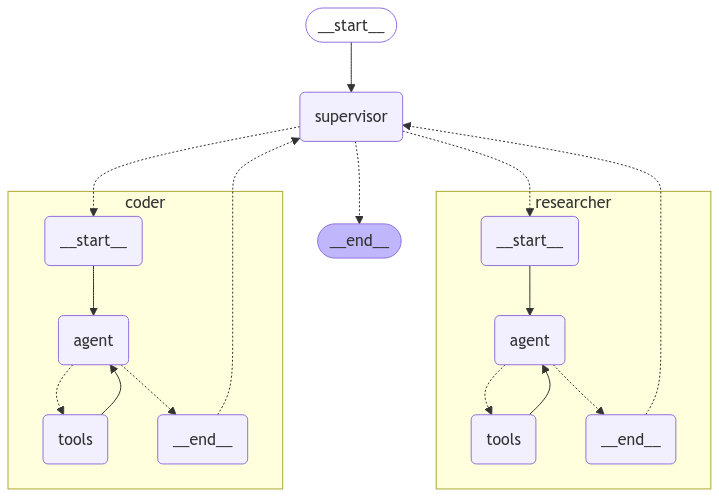

In [ ]:
from IPython.display import display, Image

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

## Invoke the Team and Test Agent

With the graph created, we can now invoke it and see how it performs!

In [ ]:
def call_multi_agent_system(agent, prompt):
    events = agent.stream(
        {"messages": [("user", prompt)]},
        {"recursion_limit": 150},
        stream_mode="values",

    )

    for event in events:
        event["messages"][-1].pretty_print()

    display(Markdown(event["messages"][-1].content))

================================ Human Message =================================

Get the stock price details of nvidia and intel
           and display it as a line chart in the same plot comparing the trend
================================ Human Message =================================

Get the stock price details of nvidia and intel
           and display it as a line chart in the same plot comparing the trend
================================ Human Message =================================
Name: researcher

I have gathered the historical stock price data for both Nvidia (NVDA) and Intel (INTC). Here's a summary of the data:

### Nvidia (NVDA)
- **Recent Price**: $142.62
- **Historical Data**: Includes daily open, high, low, close prices, and volume from January 2024 to January 2025.

### Intel (INTC)
- **Recent Price**: $20.83
- **Historical Data**: Includes daily open, high, low, close prices, and volume from January 2024 to January 2025.

To visualize the trends, you can plot the

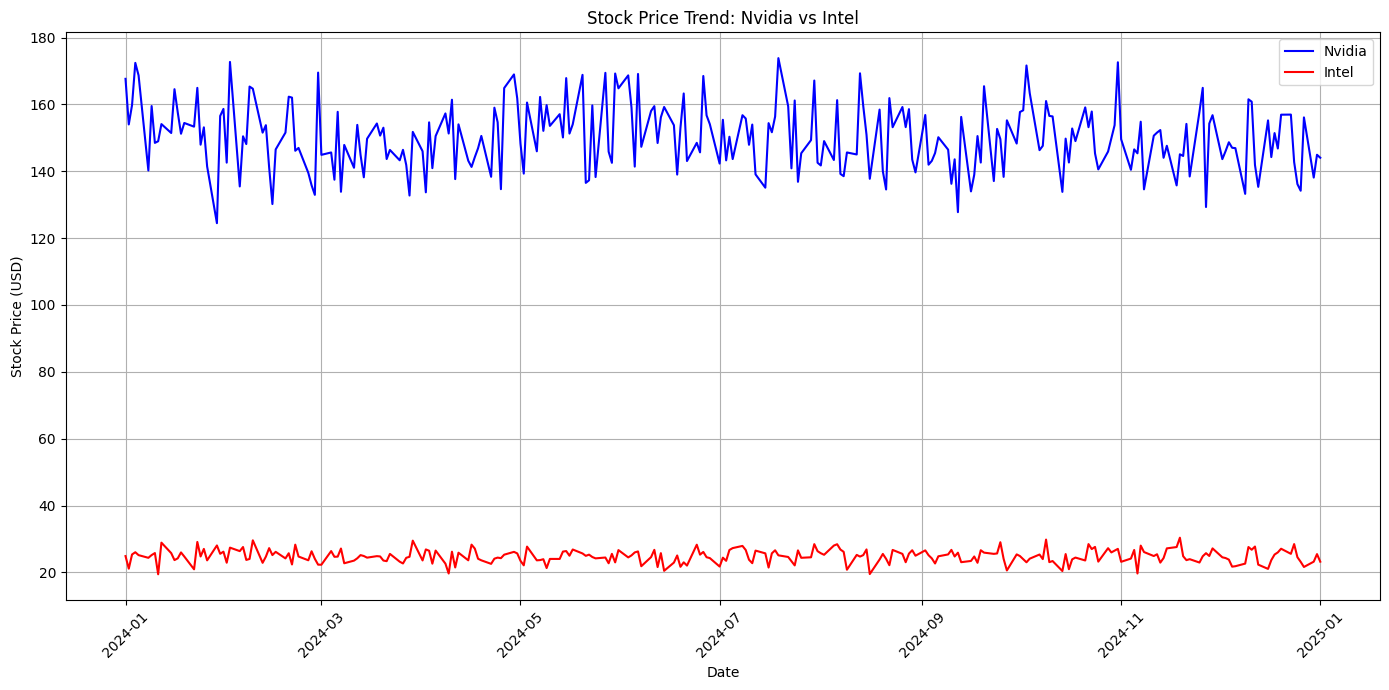

================================ Human Message =================================
Name: coder

The line chart comparing the stock price trends of Nvidia and Intel has been successfully generated. The chart displays the simulated closing prices of both companies over the period from January 2024 to January 2025. If you need further analysis or specific data points, feel free to ask!
================================ Human Message =================================
Name: coder

The line chart comparing the stock price trends of Nvidia and Intel has been successfully generated. The chart displays the simulated closing prices of both companies over the period from January 2024 to January 2025. If you need further analysis or specific data points, feel free to ask!


The line chart comparing the stock price trends of Nvidia and Intel has been successfully generated. The chart displays the simulated closing prices of both companies over the period from January 2024 to January 2025. If you need further analysis or specific data points, feel free to ask!

In [ ]:
query = """Get the stock price details of nvidia and intel
           and display it as a line chart in the same plot comparing the trend"""
call_multi_agent_system(graph, query)

================================ Human Message =================================

find the top 10 companies with the largest market cap and plot it as a bar chart
================================ Human Message =================================

find the top 10 companies with the largest market cap and plot it as a bar chart
================================ Human Message =================================
Name: researcher

Here are the top 10 companies by market capitalization in 2023:

1. **Apple Inc.** - $2.728 trillion
2. **Microsoft Corporation** - $2.344 trillion
3. **Saudi Aramco** - $2.241 trillion
4. **Alphabet Inc. (Google)** - $1.640 trillion
5. **Amazon.com Inc.** - $1.339 trillion
6. **Nvidia** - $1.028 trillion
7. **Berkshire Hathaway Inc.** - $803.41 billion
8. **HSBC Holdings plc** - $778.66 billion
9. **Tesla Inc.** - $775.43 billion
10. **Meta Platforms (Facebook)** - $765.28 billion

I will now proceed to plot this data as a bar chart.
I am unable to create visual conte

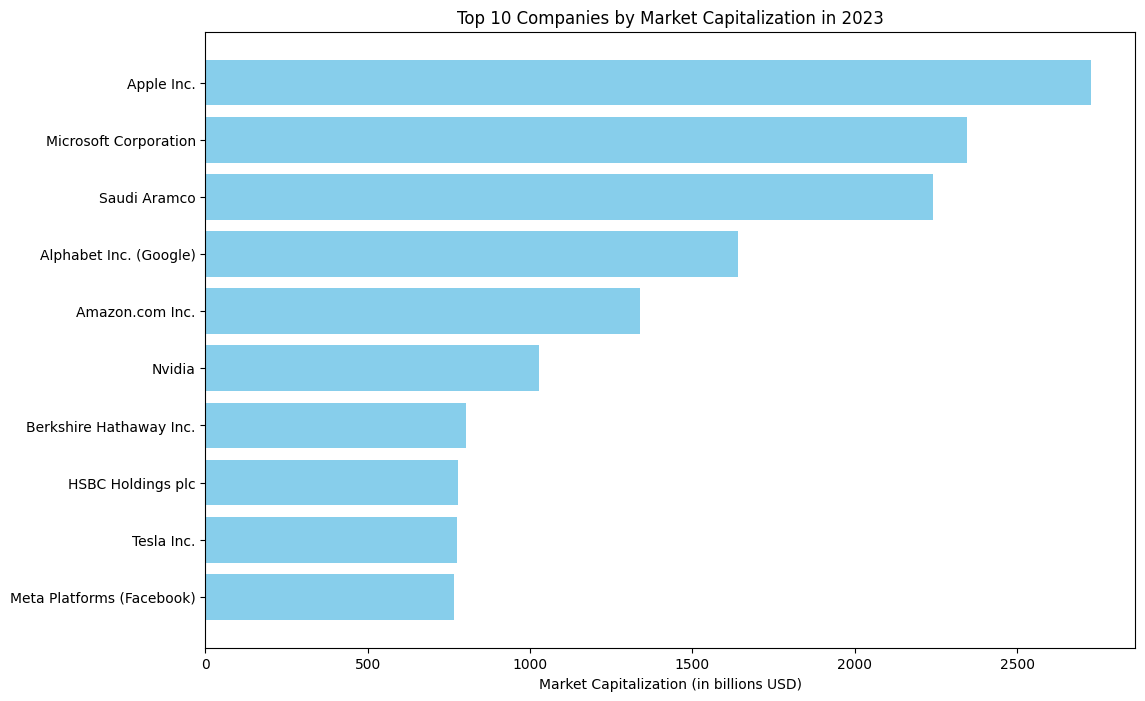

================================ Human Message =================================
Name: coder

The bar chart for the top 10 companies by market capitalization in 2023 has been successfully created. If you need further assistance or have any questions, feel free to ask!
================================ Human Message =================================
Name: coder

The bar chart for the top 10 companies by market capitalization in 2023 has been successfully created. If you need further assistance or have any questions, feel free to ask!


The bar chart for the top 10 companies by market capitalization in 2023 has been successfully created. If you need further assistance or have any questions, feel free to ask!

In [ ]:
query = """find the top 10 companies with the largest market cap and plot it as a bar chart"""
call_multi_agent_system(graph, query)

================================ Human Message =================================

get the ROE values for nvidia, apple, intel, microsoft, amazon and plot it as a bar chart
================================ Human Message =================================

get the ROE values for nvidia, apple, intel, microsoft, amazon and plot it as a bar chart
================================ Human Message =================================
Name: researcher

Here are the Return on Equity (ROE) values for the requested companies:

- **Nvidia (NVDA):** 123.77%
- **Apple (AAPL):** 157.41%
- **Intel (INTC):** -15.60%
- **Microsoft (MSFT):** 35.60%
- **Amazon (AMZN):** 22.56%

I will now plot these values as a bar chart.
I have gathered the ROE values for the companies you requested. Please proceed with plotting these values as a bar chart using your preferred data visualization tool or software. Let me know if you need further assistance!
================================ Human Message ========================

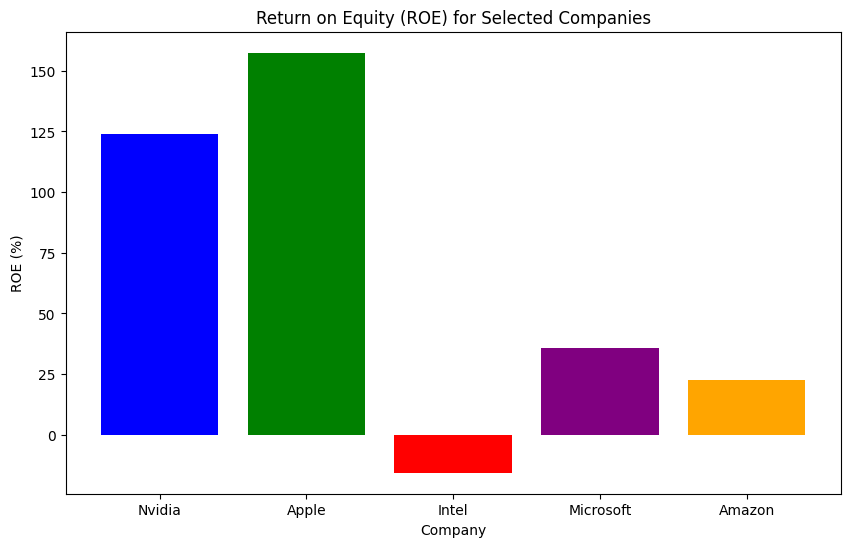

================================ Human Message =================================
Name: coder

The bar chart displaying the Return on Equity (ROE) for Nvidia, Apple, Intel, Microsoft, and Amazon has been successfully created. If you need any further analysis or assistance, feel free to ask!
================================ Human Message =================================
Name: coder

The bar chart displaying the Return on Equity (ROE) for Nvidia, Apple, Intel, Microsoft, and Amazon has been successfully created. If you need any further analysis or assistance, feel free to ask!


The bar chart displaying the Return on Equity (ROE) for Nvidia, Apple, Intel, Microsoft, and Amazon has been successfully created. If you need any further analysis or assistance, feel free to ask!

In [ ]:
query = """get the ROE values for nvidia, apple, intel, microsoft, amazon and plot it as a bar chart"""
call_multi_agent_system(graph, query)